In [2155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from matplotlib import markers
import seaborn as sns

In [2156]:
url = '/Users/gnanaprakashnarayanairivisetty/rakshith/Housing.csv'
house_data = pd.read_csv(url)
display(house_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2157]:
house_data.shape

(545, 13)

In [2158]:
house_data.isnull().sum()*105/house_data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [2159]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
training,testing = train_test_split(house_data, train_size = 0.8, test_size = 0.2, random_state = 1)


In [2160]:
def preprocess(dataset,variables):
  housing_data_new = dataset[variables].replace({'yes':1,'no':0})
  x = housing_data_new.iloc[:,1:]
  m = x.shape[0]
  target_var = np.array(housing_data_new.iloc[:,0],dtype=np.float64).reshape(m,1)
  x = np.array(x,dtype=np.float64)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))

  return x,target_var

In [2161]:
def gradient_descent(feature_set_training, feature_set_testing, Y_training, Y_testing, initial_theta,learning_rate, num_iterations):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(1, num_iterations):
        predictions_training = feature_set_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = (feature_set_training.T.dot(error_training) / m_training)
        theta -= learning_rate * gradient
        training_loss = np.sum(error_training**2) / (2 * m_training)
        training_losses.append(training_loss)
        predictions_testing = feature_set_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = np.sum(error_testing**2) / (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses[:i+1], testing_losses[:i+1]

In [2162]:
variables=[ 'price','area', 'bedrooms','bathrooms','stories','parking' ]
feature_set_training1a,Y_training1a = preprocess(training,variables)
feature_set_testing1a,Y_testing1a = preprocess(testing,variables)


In [2163]:
theta = np.zeros(6).reshape(6,1)
num_iterations1 = 7000
learning_rate1= 0.00000001
theta1a_1,loss_train1a_1,loss_test1a_1 = gradient_descent(feature_set_training1a,feature_set_testing1a,Y_training1a,Y_testing1a, theta, learning_rate1,num_iterations1)
print(theta1a_1)
print(loss_train1a_1[-1])
print(loss_test1a_1[-1])


[[ 27.67941244]
 [844.87762508]
 [104.56815147]
 [ 58.95040828]
 [ 88.82422223]
 [ 22.87374661]]
1706871086276.0884
1546865997709.3555


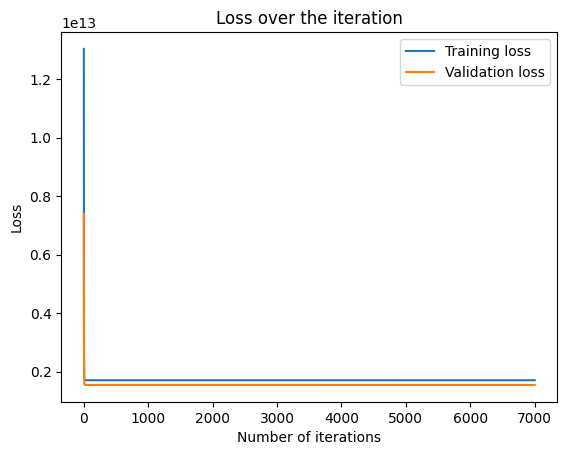

In [2164]:
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_train1a_1,label="Training loss")
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_test1a_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()




In [2165]:
theta = np.zeros(6).reshape(6,1)
num_iterations2 = 500
learning_rate2= 0.1
theta1a_2,loss_train1a_2,loss_test1a_2 = gradient_descent(feature_set_training1a,feature_set_testing1a,Y_training1a,Y_testing1a, theta, learning_rate2,num_iterations2)


/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/2919824968.py:17: RuntimeWarning: overflow encountered in square
  testing_loss = np.sum(error_testing**2) / (2 * m_testing)
/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/2919824968.py:13: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error_training**2) / (2 * m_training)
/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/2919824968.py:12: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


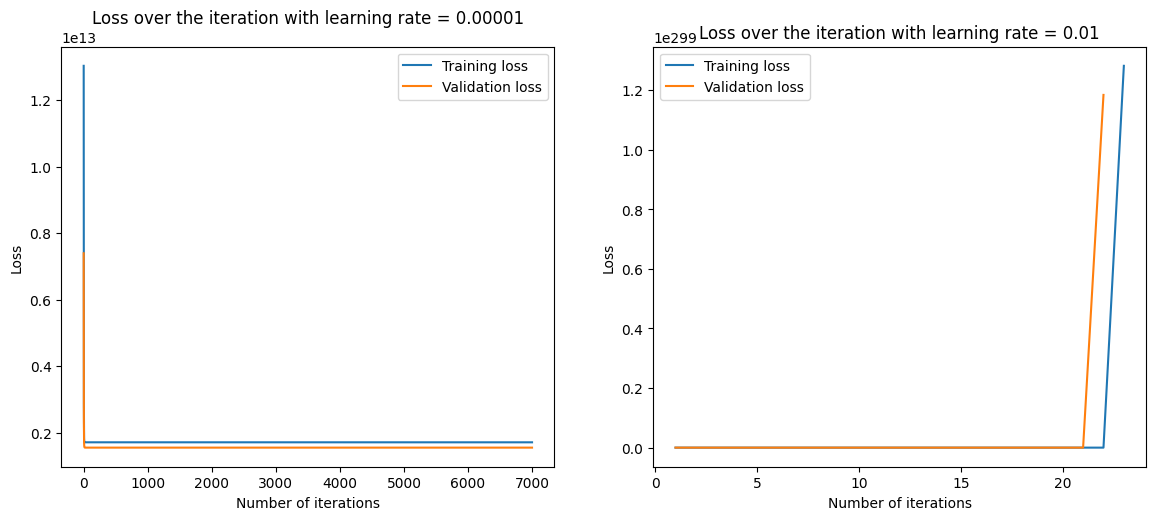

In [2166]:
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_train1a_1,label="Training loss")
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_test1a_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.00001')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([feature_set for feature_set in range(1, num_iterations2)],loss_train1a_2,label="Training loss")
plt.plot([feature_set for feature_set in range(1, num_iterations2)],loss_test1a_2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.01')
plt.legend()



In [2167]:
variables1 = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
feature_set_training1b,Y_training1b = preprocess(training,variables1)
feature_set_testing1b,Y_testing1b = preprocess(testing,variables1)

/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/682980656.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_data_new = dataset[variables].replace({'yes':1,'no':0})
/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/682980656.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_data_new = dataset[variables].replace({'yes':1,'no':0})


In [2168]:
theta = np.zeros(12).reshape(12,1)
num_iterations1 = 4000
learning_rate1= 0.00000001
theta1b_1,loss_train1b_1,loss_test1b_1 = gradient_descent(feature_set_training1b,feature_set_testing1b,Y_training1b,Y_testing1b, theta, learning_rate1,num_iterations1)
print(theta1b_1)
print(loss_train1b_1[-1])
print(loss_test1b_1[-1])

[[ 15.87490422]
 [844.91582778]
 [ 59.92875186]
 [ 33.7623086 ]
 [ 50.86033936]
 [ 13.7977395 ]
 [  6.03622702]
 [ 12.18243668]
 [  3.23050855]
 [ 11.23152309]
 [ 13.11754629]
 [  5.62137575]]
1707001012504.1233
1546945881376.4707


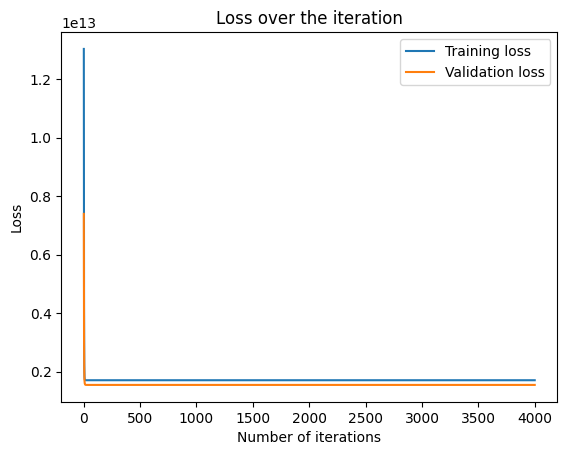

In [2169]:
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_train1b_1,label="Training loss")
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_test1b_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()


In [2170]:
theta = np.zeros(12).reshape(12,1)
num_iterations2 = 50
learning_rate2= 0.01
theta1b_2,loss_train1b_2,loss_test1b_2 = gradient_descent(feature_set_training1b,feature_set_testing1b,Y_training1b,Y_testing1b, theta, learning_rate2,num_iterations2)


/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/2919824968.py:17: RuntimeWarning: overflow encountered in square
  testing_loss = np.sum(error_testing**2) / (2 * m_testing)
/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_82198/2919824968.py:13: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error_training**2) / (2 * m_training)


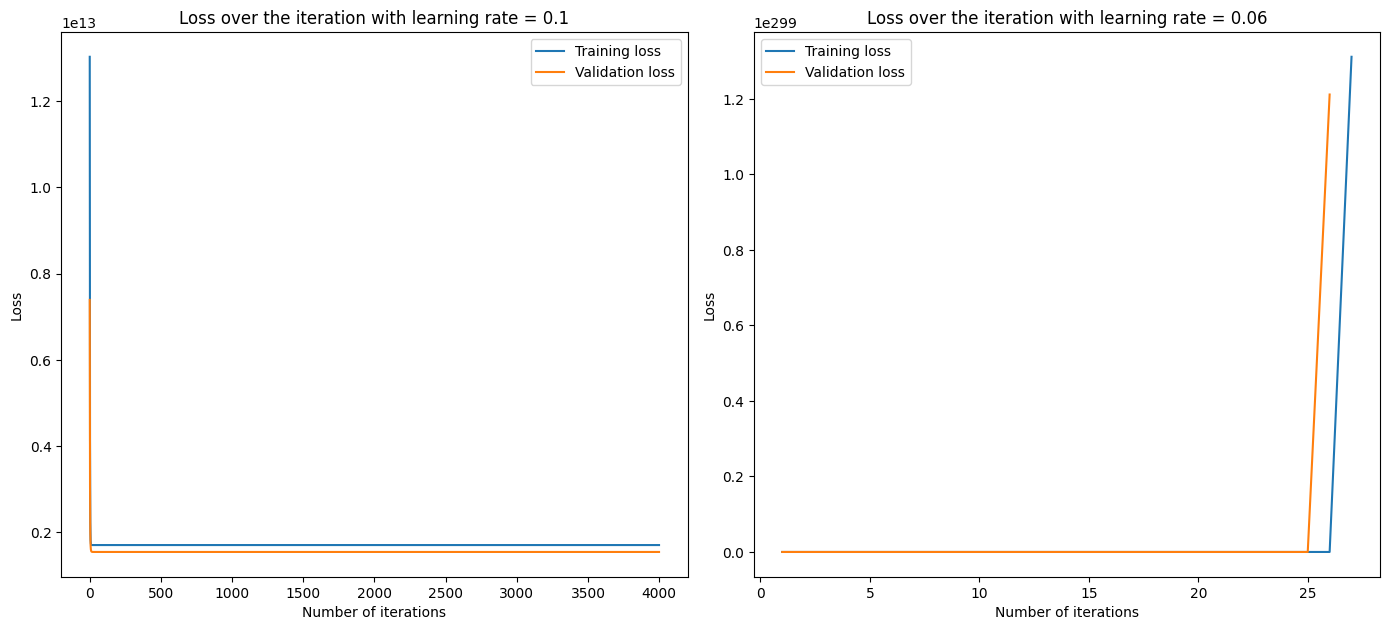

In [2171]:
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_train1b_1,label="Training loss")
plt.plot([feature_set for feature_set in range(1, num_iterations1)],loss_test1b_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.1')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([feature_set for feature_set in range(1, num_iterations2)],loss_train1b_2,label="Training loss")
plt.plot([feature_set for feature_set in range(1, num_iterations2)],loss_test1b_2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.06')
plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()

In [2172]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
standard = StandardScaler()


In [2173]:
x_testing_scaler = scaler.fit_transform(feature_set_testing1a)
x_training_scaler = scaler.fit_transform(feature_set_training1a)
x_testing_normalised = standard.fit_transform(feature_set_testing1a)
x_training_normalised = standard.fit_transform(feature_set_training1a)

In [2174]:
theta = np.zeros(6).reshape(6,1)
num_iterations1 = 20000
learning_rate= 0.09
theta2a,loss_train2a,loss_test2a = gradient_descent(x_training_scaler,x_testing_scaler,Y_training1a,Y_testing1a,theta,learning_rate, num_iterations1)
print(theta2a)
print(loss_train2a[-1])
print(loss_test2a[-1])

[[      0.        ]
 [6601711.78406836]
 [4999584.62582412]
 [2581253.75659553]
 [1654345.10791408]
 [1114854.58576835]]
977238547421.3116
1741616280911.6921


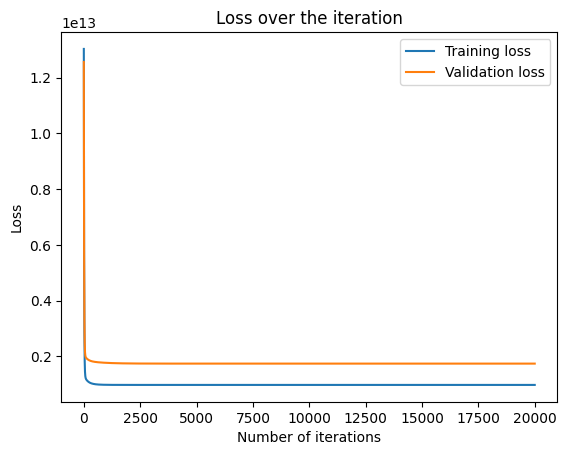

In [2175]:
plt.plot([x for x in range(1, num_iterations1)],loss_train2a,label="Training loss")
plt.plot([x for x in range(1, num_iterations1)],loss_test2a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [2176]:
theta = np.zeros(6).reshape(6,1)
num_iterations2 = 20000
learning_rate= 0.07
theta2a1,loss_train2a1,loss_test2a1 = gradient_descent(x_training_normalised,x_testing_normalised,Y_training1a,Y_testing1a,theta,learning_rate, num_iterations2)
print(theta2a1)
print(loss_train2a1[-1])
print(loss_test2a1[-1])

[[     0.        ]
 [686384.05186413]
 [ 92942.03049573]
 [615327.27269492]
 [470927.7220078 ]
 [315532.60738347]]
12069824193800.947
12348921959750.598


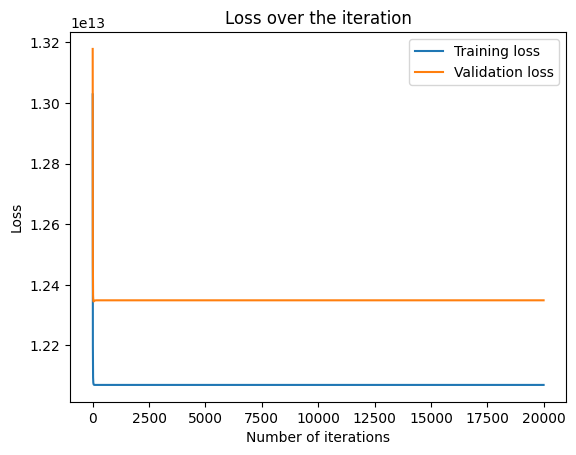

In [2177]:
plt.plot([x for x in range(1, num_iterations1)],loss_train2a1,label="Training loss")
plt.plot([x for x in range(1, num_iterations1)],loss_test2a1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [2178]:
x_testing_scaler2b = scaler.fit_transform(feature_set_testing1b)
x_training_scaler2b = scaler.fit_transform(feature_set_training1b)
x_testing_normalised2b = standard.fit_transform(feature_set_testing1b)
x_training_normalised2b = standard.fit_transform(feature_set_training1b)

In [2179]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
theta2b,loss_train2b,loss_test2b = gradient_descent(x_training_scaler2b,x_testing_scaler2b,Y_training1b,Y_testing1b,theta,learning_rate, num_iterations)
print(theta2b)
print(loss_train2b[-1])
print(loss_test2b[-1])

[[      0.        ]
 [2613500.82144847]
 [2836510.18914535]
 [2029152.76559891]
 [1574763.34205499]
 [1527632.6569242 ]
 [ 364585.66058983]
 [ 668598.55786983]
 [ 931542.86915293]
 [ 791811.85818678]
 [1072812.10268041]
 [ 556035.26613605]]
648874694160.3086
1038113740397.5852


In [2180]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
theta2b1,loss_train2b1,loss_test2b1 = gradient_descent(x_training_normalised2b,x_testing_normalised2b,Y_training1b,Y_testing1b,theta,learning_rate, num_iterations)
print(theta2b1)
print(loss_train2b1[-1])
print(loss_test2b1[-1])

[[     0.        ]
 [524985.2792882 ]
 [ 73125.24475529]
 [539017.30158929]
 [421648.97516668]
 [169995.79838679]
 [130811.10452363]
 [244064.74067418]
 [200544.94568966]
 [313301.07028142]
 [243770.45790251]
 [257924.14437135]]
11887022057470.14
12141063427650.896


In [2181]:
target_var_testing_scaler2b = scaler.fit_transform(Y_testing1b)
target_var_training_scaler2b = scaler.fit_transform(Y_training1b)
target_var_testing_normalised2b = standard.fit_transform(Y_testing1b)
target_var_training_normalised2b = standard.fit_transform(Y_training1b)

In [2182]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
theta2b_target_var,loss_train_2b_target_var,loss_test_2b_target_var = gradient_descent(x_training_scaler2b, x_testing_scaler2b,target_var_training_scaler2b,target_var_testing_scaler2b,theta,learning_rate, num_iterations)
print(theta2b_target_var)
print(loss_train_2b_target_var[-1])
print(loss_test_2b_target_var[-1])

[[0.        ]
 [0.19522002]
 [0.10949467]
 [0.21030772]
 [0.14215146]
 [0.05837507]
 [0.04275568]
 [0.04524583]
 [0.07969852]
 [0.07369352]
 [0.10742922]
 [0.06340936]]
0.004967444454873603
0.007273674792592722


In [2183]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.07
theta2b_target_var2,loss_train_2b_target_var2,loss_test_2b_target_var2 = gradient_descent(x_training_normalised2b, x_testing_normalised2b,target_var_training_normalised2b,target_var_testing_normalised2b,theta,learning_rate, num_iterations)
print(theta2b_target_var2)
print(loss_train_2b_target_var2[-1])
print(loss_test_2b_target_var2[-1])

[[0.        ]
 [0.28832568]
 [0.0401609 ]
 [0.29603215]
 [0.23157265]
 [0.0933629 ]
 [0.07184239]
 [0.13404211]
 [0.11014072]
 [0.17206718]
 [0.13388048]
 [0.14165378]]
0.15578005812066678
0.19469145717634004


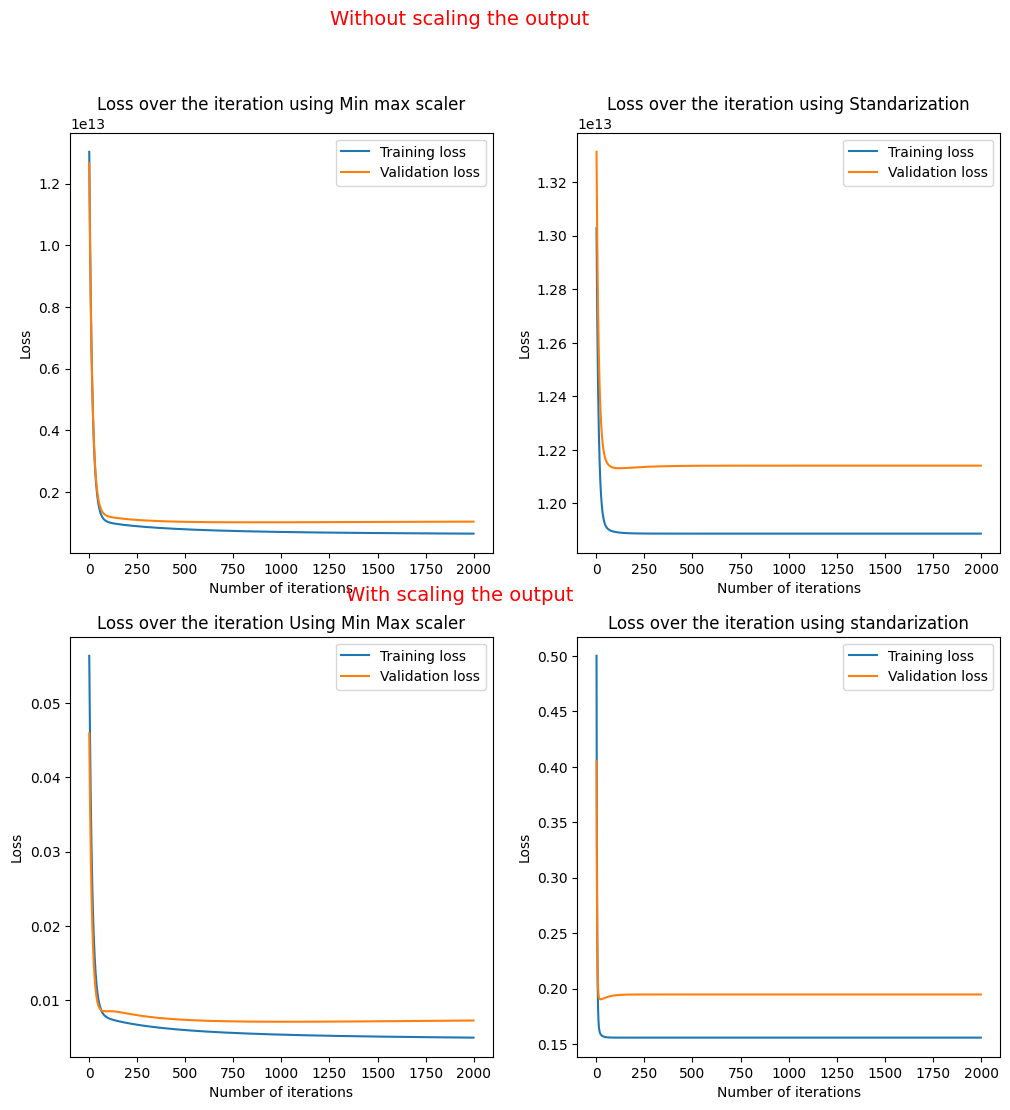

<Figure size 640x480 with 0 Axes>

In [2184]:
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([x for x in range(1, num_iterations)],loss_train2b,label="Training loss")
plt.plot([x for x in range(1, num_iterations)],loss_test2b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min max scaler')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([x for x in range(1, num_iterations)],loss_train2b1,label="Training loss")
plt.plot([x for x in range(1, num_iterations)],loss_test2b1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standarization')
plt.legend()

middle_x = 0.45  # feature_set-coordinate for the middle of the subplots
middle_target_var1 = 0.97 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_target_var1, 'Without scaling the output',color='red', ha='center', fontsize=14)

plt.subplot(2, 2, 3)
plt.plot([x for x in range(1, num_iterations)],loss_train_2b_target_var,label="Training loss")
plt.plot([x for x in range(1, num_iterations)],loss_test_2b_target_var,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration Using Min Max scaler')
plt.legend()

middle_x = 0.45  # feature_set-coordinate for the middle of the subplots
middle_target_var2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_target_var2, 'With scaling the output',color='red', ha='center', fontsize=14)

plt.subplot(2, 2, 4)
plt.plot([x for x in range(1, num_iterations)],loss_train_2b_target_var2,label="Training loss")
plt.plot([x for x in range(1, num_iterations)],loss_test_2b_target_var2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using standarization')
plt.legend()
plt.show()
# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()

In [2185]:
def gradient_descent_penalttarget_var(feature_set_training, feature_set_testing, Y_training, Y_testing, initial_theta,learning_rate, num_iterations, alpha):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(1, num_iterations):
        predictions_training = feature_set_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = ((feature_set_training.T.dot(error_training) +alpha*theta)/ m_training)
        theta -= learning_rate * gradient
        training_loss = (np.sum(error_training**2)+alpha * np.sum(np.square(theta))) / (2 * m_training)
        training_losses.append(training_loss)
        predictions_testing = feature_set_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = (np.sum(error_testing**2))/ (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses[:i+1], testing_losses[:i+1]

In [2186]:
theta = np.zeros(6).reshape(6,1)
num_iterations = 2000
learning_rate= 0.03
alpha = 1
theta3ap,loss_train3a,loss_test3a = gradient_descent_penalttarget_var(x_training_scaler, x_testing_scaler,Y_training1a,Y_testing1a,theta,learning_rate,num_iterations,alpha)
print(theta3ap)
print(loss_train3a[-1])
print(loss_test3a[-1])


[[      0.        ]
 [5516977.59785416]
 [5321896.59495138]
 [2158698.62058401]
 [1842602.87947446]
 [1494781.2837949 ]]
1074312481354.2256
1788891484388.6514


In [2187]:
theta = np.zeros(6).reshape(6,1)
num_iterations = 2000
learning_rate= 0.09
alpha = 8
theta3a1,loss_train3a1,loss_test3a1 = gradient_descent_penalttarget_var(x_training_normalised, x_testing_normalised,Y_training1a,Y_testing1a,theta,learning_rate,num_iterations,alpha)
print(theta3a1)
print(loss_train3a1[-1])
print(loss_test3a1[-1])

[[     0.        ]
 [675614.12632138]
 [ 99124.08453448]
 [606537.68163228]
 [463563.66614807]
 [314460.38996169]]
12080500250871.613
12349236689487.984


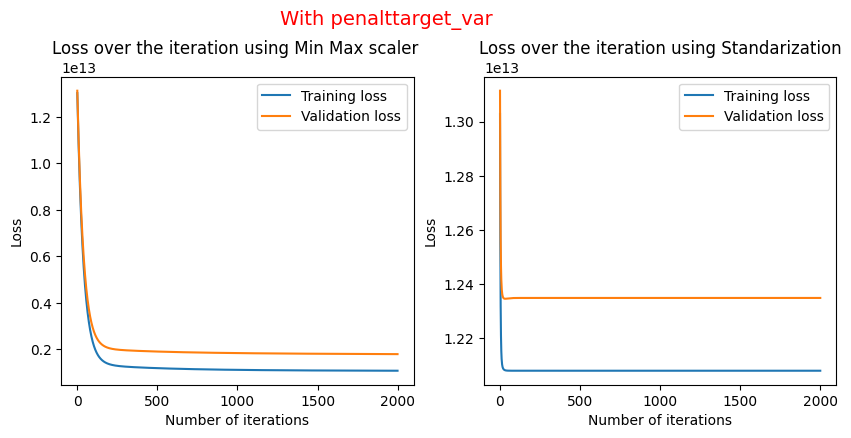

In [2188]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot([x for x in range(1, num_iterations)],loss_train3a,label="Training loss")
plt.plot([x for x in range(1, num_iterations)],loss_test3a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler ')
plt.legend()

middle_x = 0.45  # feature_set-coordinate for the middle of the subplots
middle_target_var1 = 1.01  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_target_var1, 'With penalttarget_var',color='red', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot([x for x in range(1, num_iterations)],loss_train3a1,label="Training loss")
plt.plot([x for x in range(1, num_iterations)],loss_test3a1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standarization')
plt.legend()
plt.show()

In [2189]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 3
theta3b,loss_train3b,loss_test3b = gradient_descent_penalttarget_var(x_training_scaler2b, x_testing_scaler2b,Y_training1b,Y_testing1b,theta,learning_rate,num_iterations,alpha)
print(theta3b)
print(loss_train3b[-1])
print(loss_test3b[-1])

[[      0.        ]
 [2415233.84514707]
 [2697759.1667304 ]
 [1874013.34808706]
 [1555460.32268536]
 [1621390.69112533]
 [ 376560.24948709]
 [ 686228.37214281]
 [ 869765.14751251]
 [ 821359.74217259]
 [1074021.71213208]
 [ 566261.05774464]]
748547368615.1117
1024082299926.0344


In [2190]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 3
theta3b1,loss_train3b1,loss_test3b1 = gradient_descent_penalttarget_var(x_training_normalised2b, x_testing_normalised2b,Y_training1b,Y_testing1b,theta,learning_rate,num_iterations,alpha)
print(theta3b1)
print(loss_train3b1[-1])
print(loss_test3b1[-1])

[[     0.        ]
 [521723.66454027]
 [ 75761.48607893]
 [536379.49414979]
 [418526.60822543]
 [170640.04708739]
 [131705.55499603]
 [241789.46419556]
 [199105.67895155]
 [312752.97703652]
 [243623.07057489]
 [257319.36075184]]
11890854446948.652
12140955198657.736


In [2191]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 1
theta3btarget_var,loss_train3btarget_var,loss_test3btarget_var = gradient_descent_penalttarget_var(x_training_scaler2b, x_testing_scaler2b,target_var_training_scaler2b,target_var_testing_scaler2b,theta,learning_rate, num_iterations,alpha)
print(theta3btarget_var)
print(loss_train3btarget_var[-1])
print(loss_test3btarget_var[-1])

[[0.        ]
 [0.18961339]
 [0.10914546]
 [0.20395663]
 [0.1405147 ]
 [0.0609289 ]
 [0.04284066]
 [0.04550531]
 [0.07765266]
 [0.07432615]
 [0.10650546]
 [0.06324024]]
0.005162772795931416
0.0072185282401952145


In [2192]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 1
theta3btarget_var1,loss_train3btarget_var1,loss_test3btarget_var1 = gradient_descent_penalttarget_var(x_training_normalised2b, x_testing_normalised2b,target_var_training_normalised2b,target_var_testing_normalised2b,theta,learning_rate, num_iterations,alpha)
print(theta3btarget_var1)
print(loss_train3btarget_var1[-1])
print(loss_test3btarget_var1[-1])

[[0.        ]
 [0.28772414]
 [0.04064952]
 [0.29554728]
 [0.23099544]
 [0.09348332]
 [0.0720089 ]
 [0.13362108]
 [0.10987588]
 [0.17196781]
 [0.13385399]
 [0.14154352]]
0.15616658215769852
0.19459165920981425


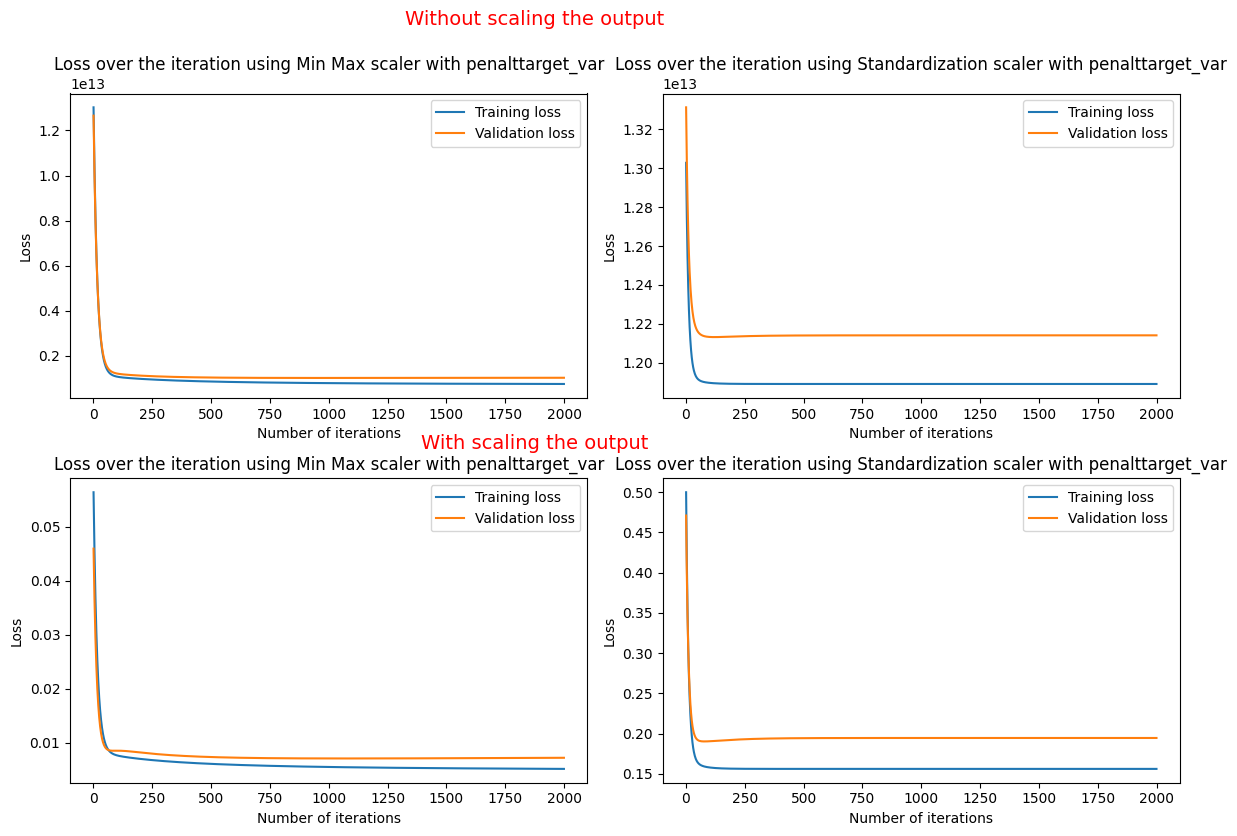

In [2193]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Subplot 1: Min Max scaler with penalttarget_var and without normalizing outputs
plt.subplot(2, 2, 1)
plt.plot([x for x in range(1, num_iterations)], loss_train3b, label="Training loss")
plt.plot([x for x in range(1, num_iterations)], loss_test3b, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalttarget_var')
plt.legend()

middle_x = 0.45  # feature_set-coordinate for the middle of the subplots
middle_target_var1 = 1.02  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_target_var1, 'Without scaling the output',color='red', ha='center', fontsize=14)

# Subplot 2: Standardization scaler with penalttarget_var and without normalizing outputs
plt.subplot(2, 2, 2)
plt.plot([x for x in range(1, num_iterations)], loss_train3b1, label="Training loss")
plt.plot([x for x in range(1, num_iterations)], loss_test3b1, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalttarget_var')
plt.legend()

# Subplot 3: Min Max scaler with penalttarget_var and with normalizing outputs
plt.subplot(2, 2, 3)
plt.plot([x for x in range(1, num_iterations)], loss_train3btarget_var, label="Training loss")
plt.plot([x for x in range(1, num_iterations)], loss_test3btarget_var, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalttarget_var')
plt.legend()

middle_x = 0.45  # feature_set-coordinate for the middle of the subplots
middle_target_var2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_target_var2, 'With scaling the output',color='red', ha='center', fontsize=14)

# Subplot 4: Standardization scaler with penalttarget_var and with normalizing outputs
plt.subplot(2, 2, 4)
plt.plot([x for x in range(1, num_iterations)], loss_train3btarget_var1, label="Training loss")
plt.plot([x for x in range(1, num_iterations)], loss_test3btarget_var1, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalttarget_var')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()




In [2194]:
def gradient_descent_penalty(X_training, X_testing, Y_training, Y_testing, initial_theta,learning_rate, num_iterations, alpha):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(num_iterations):
        predictions_training = X_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = ((X_training.T.dot(error_training) +alpha*theta)/ m_training)
        theta -= learning_rate * gradient
        training_loss = (np.sum(error_training**2)+alpha * np.sum(np.square(theta))) / (2 * m_training)
        training_losses.append(training_loss)
        predictions_testing = X_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = (np.sum(error_testing**2))/ (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses[:i+1], testing_losses[:i+1]

In [2195]:
theta = np.zeros(6).reshape(6,1)
num_iterations = 2000
learning_rate= 0.03
alpha = 1
theta3ap,loss_train3a,loss_test3a = gradient_descent_penalty(x_training_scaler, x_testing_scaler,Y_training1a,Y_testing1a,theta,learning_rate,num_iterations,alpha)
print(theta3ap)
print(loss_train3a[-1])
print(loss_test3a[-1])


[[      0.        ]
 [5517486.70915652]
 [5321832.89907108]
 [2158889.8657478 ]
 [1842425.35728584]
 [1494539.96185767]]
1074299475340.2168
1788865865401.659


In [2196]:
theta = np.zeros(6).reshape(6,1)
num_iterations = 2000
learning_rate= 0.08
alpha = 8
theta3a1,loss_train3a1,loss_test3a1 = gradient_descent_penalty(x_training_normalised, x_testing_normalised,Y_training1a,Y_testing1a,theta,learning_rate,num_iterations,alpha)
print(theta3a1)
print(loss_train3a1[-1])
print(loss_test3a1[-1])

[[     0.        ]
 [675614.12632138]
 [ 99124.08453448]
 [606537.68163228]
 [463563.66614807]
 [314460.38996169]]
12080500250871.613
12349236689487.984


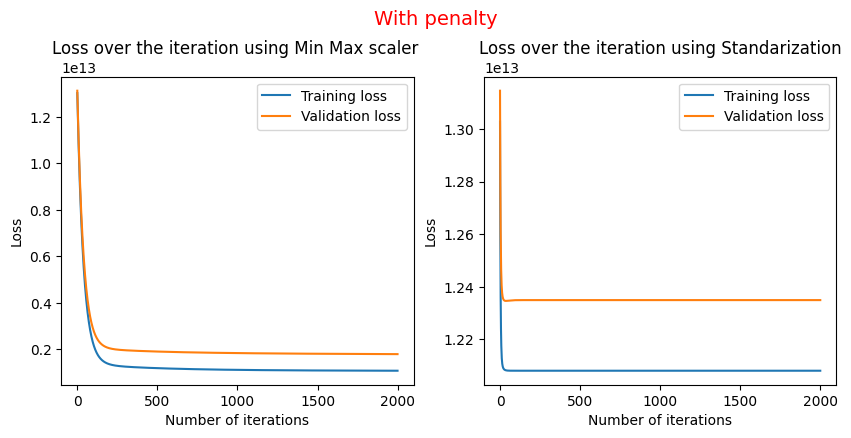

In [2197]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot([x for x in range(num_iterations)],loss_train3a,label="Training loss")
plt.plot([x for x in range(num_iterations)],loss_test3a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler ')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 1.01  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'With penalty',color='red', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot([x for x in range(num_iterations)],loss_train3a1,label="Training loss")
plt.plot([x for x in range(num_iterations)],loss_test3a1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standarization')
plt.legend()
plt.show()

In [2198]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 3
theta3b,loss_train3b,loss_test3b = gradient_descent_penalty(x_training_scaler2b, x_testing_scaler2b,Y_training1b,Y_testing1b,theta,learning_rate,num_iterations,alpha)
print(theta3b)
print(loss_train3b[-1])
print(loss_test3b[-1])

[[      0.        ]
 [2415657.88353854]
 [2697923.28480999]
 [1874270.50217409]
 [1555371.01522591]
 [1621256.56525729]
 [ 376543.50662431]
 [ 686200.59196215]
 [ 869829.53969855]
 [ 821321.75534544]
 [1073924.62239226]
 [ 566249.49905109]]
748531594257.072
1024088320246.6519


In [2199]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 3
theta3b1,loss_train3b1,loss_test3b1 = gradient_descent_penalty(x_training_normalised2b, x_testing_normalised2b,Y_training1b,Y_testing1b,theta,learning_rate,num_iterations,alpha)
print(theta3b1)
print(loss_train3b1[-1])
print(loss_test3b1[-1])

[[     0.        ]
 [521723.66463645]
 [ 75761.48596208]
 [536379.49409859]
 [418526.60841314]
 [170640.04702028]
 [131705.55492643]
 [241789.46434369]
 [199105.67894992]
 [312752.9769763 ]
 [243623.07059636]
 [257319.36070268]]
11890854446948.648
12140955198693.871


In [2200]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 1
theta3by,loss_train3by,loss_test3by = gradient_descent_penalty(x_training_scaler2b, x_testing_scaler2b,Y_training1a,Y_testing1a,theta,learning_rate, num_iterations,alpha)
print(theta3by)
print(loss_train3by[-1])
print(loss_test3by[-1])

[[      0.        ]
 [2544290.22208004]
 [2788324.66217923]
 [1975111.67228367]
 [1568366.64081166]
 [1560425.37495505]
 [ 368749.3294157 ]
 [ 674715.75706416]
 [ 910094.56585715]
 [ 802174.11082575]
 [1073466.47258126]
 [ 559570.8919418 ]]
683375588707.4082
1032557944282.0667


In [2201]:
theta = np.zeros(12).reshape(12,1)
num_iterations = 2000
learning_rate= 0.02
alpha = 1
theta3by1,loss_train3by1,loss_test3by1 = gradient_descent_penalty(x_training_normalised2b, x_testing_normalised2b,Y_training1a,Y_testing1a,theta,learning_rate, num_iterations,alpha)
print(theta3by1)
print(loss_train3by1[-1])
print(loss_test3by1[-1])

[[     0.        ]
 [523890.01998477]
 [ 74014.9176634 ]
 [538134.43456026]
 [420598.02803205]
 [170215.03905871]
 [131114.2742184 ]
 [243298.14804202]
 [200062.71946338]
 [313120.13112287]
 [243722.23282449]
 [257723.37160666]]
11888303514782.627
12141020647709.791


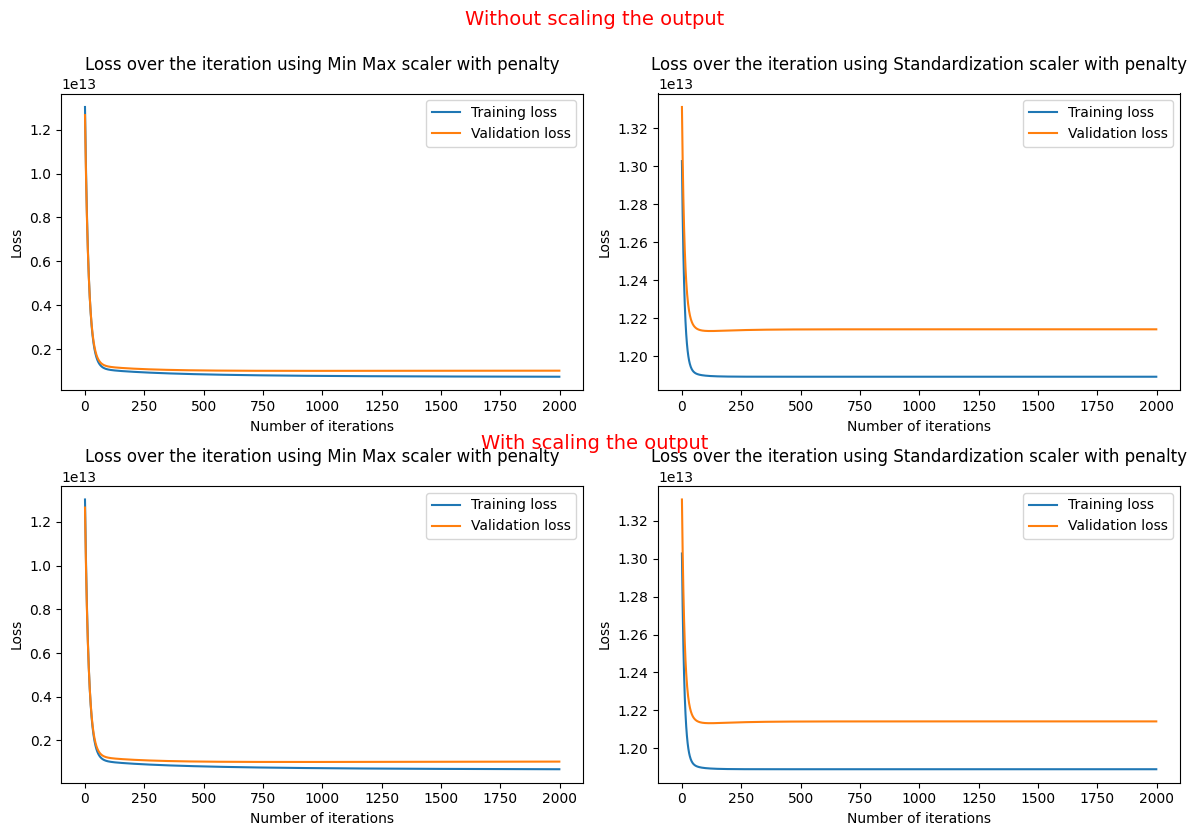

In [2202]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Subplot 1: Min Max scaler with penalty and without normalizing outputs
plt.subplot(2, 2, 1)
plt.plot([x for x in range(num_iterations)], loss_train3b, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3b, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalty')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 1.02  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'Without scaling the output',color='red', ha='center', fontsize=14)

# Subplot 2: Standardization scaler with penalty and without normalizing outputs
plt.subplot(2, 2, 2)
plt.plot([x for x in range(num_iterations)], loss_train3b1, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3b1, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalty')
plt.legend()

# Subplot 3: Min Max scaler with penalty and with normalizing outputs
plt.subplot(2, 2, 3)
plt.plot([x for x in range(num_iterations)], loss_train3by, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3by, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalty')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y2, 'With scaling the output',color='red', ha='center', fontsize=14)

# Subplot 4: Standardization scaler with penalty and with normalizing outputs
plt.subplot(2, 2, 4)
plt.plot([x for x in range(num_iterations)], loss_train3by1, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3by1, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalty')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()


